In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re

In [2]:
df = pd.read_csv("twitter.csv")

In [14]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt as a woman you shouldnt complain about cle...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt boy dats coldtyga dwn bad for cuffin dat h...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt dawg rt you ever fuck a bitch and she sta...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt the shit you hear about me might be true o...


In [4]:
df.shape

(24783, 7)

In [6]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

<Axes: title={'center': 'Label Distribution'}, xlabel='class'>

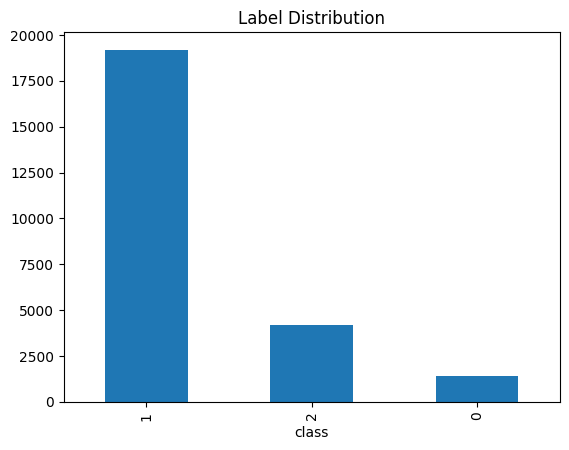

In [16]:
df['class'].value_counts().plot(kind='bar', title='Label Distribution')

In [9]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower().strip()
    return text

df['clean_tweet'] = df['tweet'].apply(clean_text)
df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,rt as a woman you shouldnt complain about cle...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt boy dats coldtyga dwn bad for cuffin dat h...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt dawg rt you ever fuck a bitch and she sta...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt the shit you hear about me might be true o...


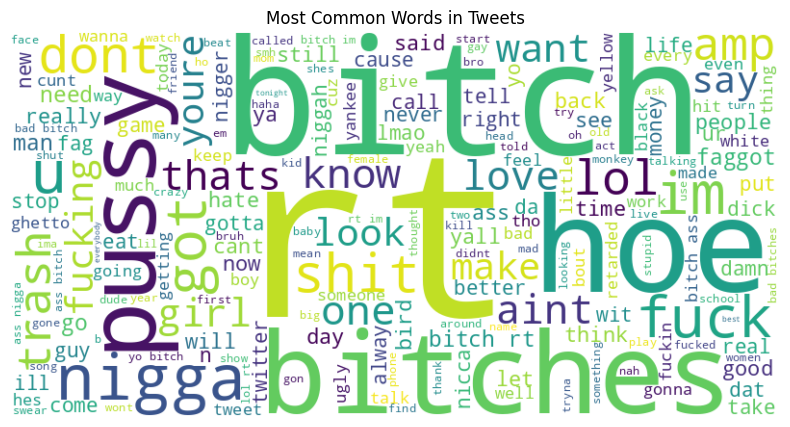

In [37]:
from wordcloud import WordCloud

text = " ".join(tweet for tweet in df['clean_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.show()

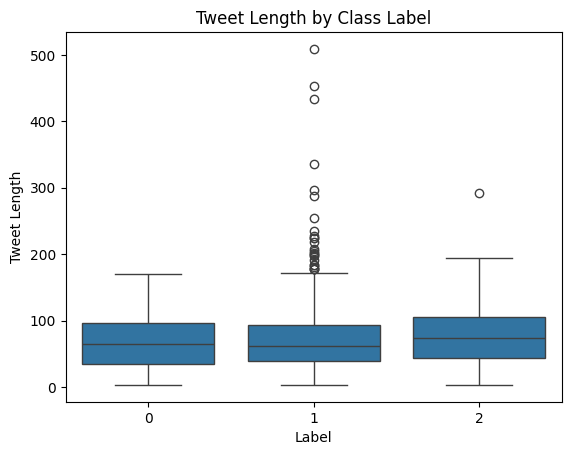

In [40]:
df['tweet_len'] = df['clean_tweet'].apply(len)
sns.boxplot(data=df, x='class', y='tweet_len')
plt.title("Tweet Length by Class Label")
plt.xlabel("Label")
plt.ylabel("Tweet Length")
plt.show()

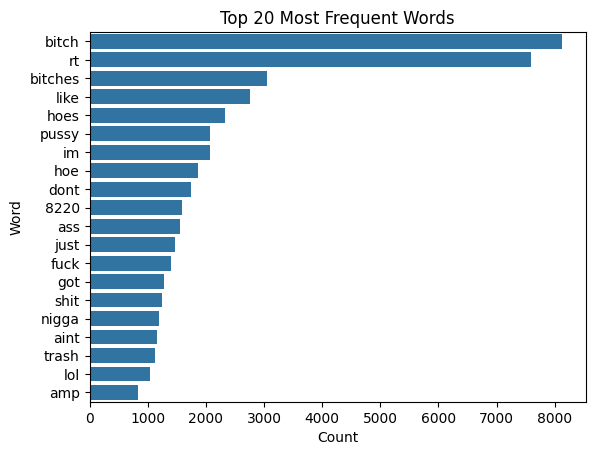

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=20)
word_counts = cv.fit_transform(df['clean_tweet'])
word_sum = word_counts.toarray().sum(axis=0)
words = cv.get_feature_names_out()

freq_df = pd.DataFrame({'word': words, 'count': word_sum})
freq_df = freq_df.sort_values(by='count', ascending=False)

sns.barplot(data=freq_df, x='count', y='word')
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [19]:
X = df['clean_tweet']
y = df['class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [22]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test_vec)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8856163001815615


In [25]:
claccification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
 <function classification_report at 0x78068777ca40>


In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  45,  214,   31],
       [  41, 3683,  108],
       [   3,  170,  662]])

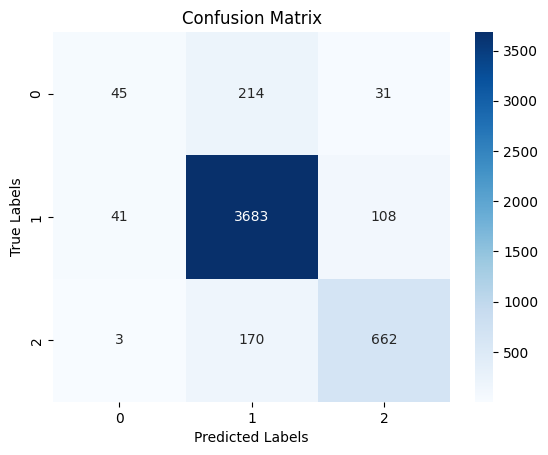

In [27]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

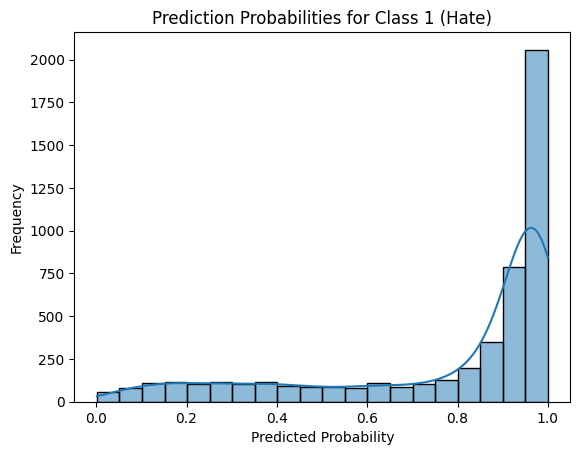

In [42]:
y_probs = model.predict_proba(X_test_vec)[:, 1]

sns.histplot(y_probs, bins=20, kde=True)
plt.title("Prediction Probabilities for Class 1 (Hate)")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

In [28]:
def predict_tweet(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    pred = model.predict(vector)[0]
    return pred

In [31]:
print(predict_tweet("i love you!"))

1


In [32]:
print(predict_tweet("love this movie!"))

2


In [36]:
print(predict_tweet(" "))

1
